# Explore here

In [659]:
# Basicas
import pandas as pd
import numpy as np
import random

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Limpieza de texto
import re

# Separacion de datos
from sklearn.model_selection import train_test_split

# Vectorizacion de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.naive_bayes import MultinomialNB

# Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Otros
import warnings
warnings.filterwarnings('ignore')

In [660]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [661]:
# Tamaño de mis datos
data.shape

(891, 3)

In [662]:
# Informacion general de mis datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [663]:
# Búsqueda de duplicados
data.duplicated().sum()

np.int64(0)

**INFORMACION GENERAL DE MIS DATOS**  

Tenemos 891 datos distribuidos en 3 columnas. El atributo `package_name` solo hace referencia a la aplicación de la cual se escribió la reseña, por lo cual no resulta muy útil a la predicción que buscamos, que va a ser más basada en si un comentario es positivo o negativo según el contenido de dicho comentario. Nuestra variable a predecir es `polarity` y toma valores de 0 (comentarios negativos) o 1(comentarios positivos) y la variable predictora será `review`.

En ambos casos, variable predictora y variable a predecir, no presentan valores nulos.

No se observan tampoco duplicados en mis datos.

Se procede a continuación al procesamiento del texto contenido en el atributo `review` para obtener patrones a ser usados por el modelo.

In [664]:
# Selección de atributos relevantes
data = data.drop("package_name", axis=1)
data.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [665]:
# Funcion para limpiar texto
def clean_text(texto):
    texto = texto.lower() # Minusculas
    texto = re.sub(r'\d+', '', texto) # Numeros
    texto = re.sub(r'[^\w\s]', '', texto) # Signos de puntuacion
    texto = re.sub(r'\s+', ' ', texto).strip() # Espacios multiples y al inicio y final
    return texto

In [666]:
# Limpieza de texto en la columna "review"
data["review"] = data["review"].apply(clean_text)

In [667]:
# Separación de train y test
X = data.drop("polarity", axis = 1)
y = data['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Guardar mi informacion en dos archivos .csv para el trabajo desde app.py
# Unir X_train con y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Unir X_test con y_test
test_data = pd.concat([X_test, y_test], axis=1)

# Guardar en archivos CSV
train_data.to_csv('../data/processed/train_data.csv', index=False)
test_data.to_csv('../data/processed/test_data.csv', index=False)

In [668]:
# Vectorización con TfidfVectorizer
# Mejor por ahora: vectorizer = TfidfVectorizer(stop_words="english", max_df=0.9, min_df=2)
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.9, min_df=2)

X_train_tfidf = vectorizer.fit_transform(X_train["review"])
X_test_tfidf = vectorizer.transform(X_test["review"])

In [669]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10473 stored elements and shape (712, 1383)>

In [670]:
# Entrenamiento del clasificador
model = MultinomialNB(alpha=0.95)

model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.95)

In [671]:
# Predicción
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

In [672]:
# Metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  0.8268156424581006
Accuracy Train:  0.9058988764044944


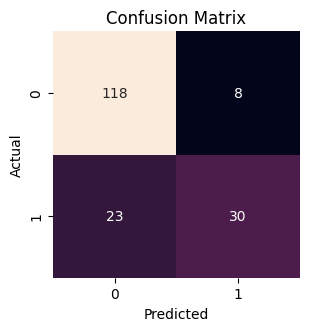

In [673]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(conf_matrix)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

****Estos son los resultados de la aplicacion del algoritmo MultinomialNB****

- Mi modelo tiene un buen accuracy de 82 % sin llegar a estar en overfitting
- Excelente prediccion de comentarios negativos, acierto de un 93 % (118 de 126)
- Regular prediccion de comentarios positivos, acierto de un 56 % (30 de 53)

De las 3 variantes de Naive-Bayes se escogio MultinomialNB por la caracteristica de mis datos, que representan datos discretos de conteo de apariciones de palabras en un texto. Las otras 2 variantes no deberian ser las apropiadas, aun asi las vamos a implementar y comparar resultados a continuación.

In [674]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# Entrenamiento del clasificador
model_gaussian = GaussianNB()
model_bernoulli = BernoulliNB()

# Conversion a array
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

model_gaussian.fit(X_train_dense, y_train)
model_bernoulli.fit(X_train_tfidf, y_train)

# Predicciones
y_pred_train_gaussian = model_gaussian.predict(X_train_dense)
y_pred_test_gaussian = model_gaussian.predict(X_test_dense)

y_pred_train_bernoulli = model_bernoulli.predict(X_train_tfidf)
y_pred_test_bernoulli = model_bernoulli.predict(X_test_tfidf)

# Metricas
accuracy_test_gaussian = accuracy_score(y_test, y_pred_test_gaussian)
accuracy_train_gaussian = accuracy_score(y_train, y_pred_train_gaussian)

accuracy_test_bernoulli = accuracy_score(y_test, y_pred_test_bernoulli)
accuracy_train_bernoulli = accuracy_score(y_train, y_pred_train_bernoulli)

print("GaussianNB")
print("Accuracy Test: ", accuracy_test_gaussian)
print("Accuracy Train: ", accuracy_train_gaussian)

print("BernoulliNB")
print("Accuracy Test: ", accuracy_test_bernoulli)
print("Accuracy Train: ", accuracy_train_bernoulli)


GaussianNB
Accuracy Test:  0.7932960893854749
Accuracy Train:  0.9480337078651685
BernoulliNB
Accuracy Test:  0.7821229050279329
Accuracy Train:  0.922752808988764


**Resumen:**

Las 3 variantes del modelo dan un accuracy parecido, estos dos ultimos con algo mas de overfitting, aunque cabe decir que están con sus parámetros por defecto y pueden ser optimizados.

A continuacion probaremos el rendimiento con un Random Forest



In [783]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [789]:
param_grid = {
    'n_estimators': [100, 200],           # Número de árboles en el bosque
    'max_depth': [10, 15],           # Profundidad máxima de cada árbol
    'min_samples_split': [5, 10],          # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2, 4],            # Mínimo de muestras en una hoja
    'max_features': ['sqrt'],         # Número de características a considerar en cada división
    'bootstrap': [True],               # Si usar bootstrap o no
    'class_weight': ['balanced']        # Para tratar el desbalance de clases
}

# Configuramos el GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                    # Validación cruzada con 5 folds
    scoring='accuracy',     # Puedes cambiarlo a 'roc_auc', 'f1', etc. si te interesa otra métrica
    n_jobs=-1,              # Usa todos los núcleos disponibles para paralelizar
    verbose=2
)
grid_search.fit(X_train_dense, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; tota

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [790]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [791]:
model_rf = RandomForestClassifier(bootstrap=True, class_weight="balanced", max_depth=10, max_features="sqrt", min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)
model_rf.fit(X_train_dense, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [792]:
y_pred_test_rf = model_rf.predict(X_test_dense)
y_pred_train_rf = model_rf.predict(X_train_dense)

In [793]:
# Metricas
accuracy_test = accuracy_score(y_test, y_pred_test_rf)
accuracy_train = accuracy_score(y_train, y_pred_train_rf)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  0.7988826815642458
Accuracy Train:  0.901685393258427
